In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import statsmodels.api as sm 
import pylab as py 

import warnings
warnings.filterwarnings('ignore')
sns.set(style="dark")

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
data = pd.read_csv('/content/drive/MyDrive/dphi_data/churn_prediction.csv')
data.head()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,last_transaction
0,1,2101,66,Male,0.0,self_employed,187.0,2,755,1458.71,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0,2019-05-21
1,2,2348,35,Male,0.0,self_employed,NaN,2,3214,5390.37,8704.66,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0,2019-11-01
2,4,2194,31,Male,0.0,salaried,146.0,2,41,3913.16,5815.29,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0,NaT
3,5,2329,90,NaN,NaN,self_employed,1020.0,2,582,2291.91,2291.91,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1,2019-08-06
4,6,1579,42,Male,2.0,self_employed,1494.0,3,388,927.72,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1,2019-11-03


# Multivariate Analysis
- here we will see more than one variable at a time, and try to see the relation of them

In [5]:
#data['customer_nw_category'] = data.customer_nw_category.astype('int64')

In [6]:
#realtion of gender, occupation and customer net worth category with churn using pivot table
#data.pivot_table('churn', ['gender', 'occupation'], 'customer_nw_category', aggfunc= 'sum')
data.pivot_table('churn', ['gender', 'occupation'], columns= 'customer_nw_category', aggfunc = 'sum')


customer_nw_category    1    2    3
gender occupation                  
Female company          1    0    2
       retired         12   23   17
       salaried        51  128  124
       self_employed  211  761  512
       student         18   79   43
Male   company          0    0    0
       retired         32  120  101
       salaried        92  395  357
       self_employed  237  942  700
       student         28   95   61

we can 

In [7]:
data.pivot_table('churn', ['gender', 'occupation'], 'customer_nw_category', aggfunc='mean')*100

customer_nw_category           1          2          3
gender occupation                                     
Female company        100.000000   0.000000  66.666667
       retired         20.689655  11.219512  13.492063
       salaried        18.545455  14.849188  17.689016
       self_employed   18.111588  18.197035  18.920916
       student         10.404624  14.442413  15.034965
Male   company          0.000000   0.000000   0.000000
       retired         18.497110  14.251781  16.316640
       salaried        17.557252  16.410469  18.468702
       self_employed   22.832370  20.424978  21.465808
       student         16.969697  17.210145  18.208955

In [8]:
data.dtypes

customer_id                         int64
vintage                             int64
age                                 int64
gender                             object
dependents                        float64
occupation                         object
city                              float64
customer_nw_category                int64
branch_code                         int64
current_balance                   float64
previous_month_end_balance        float64
average_monthly_balance_prevQ     float64
average_monthly_balance_prevQ2    float64
current_month_credit              float64
previous_month_credit             float64
current_month_debit               float64
previous_month_debit              float64
current_month_balance             float64
previous_month_balance            float64
churn                               int64
last_transaction                   object
dtype: object

- we can see that frequency wise , male customer who are self employed and belong to middle net worth category have churned more.
- by proportion, in the net worth category 1 , customer who are male and self employed , their churning rate is highest i.e. around 22.8%
- by proportion, in the net worth category 2 again customer who are male and self employed, their churning rate is highest around 20.4%
- by proportion, in the net worth category 3 , again customer who are self employed and male, their churn rate is highest.
- in all the cases customer who are self employed and male have churned more, so it would be really intresting to dig deeper into them

# Gender, Age and occupation with churning status

In [9]:
# let's divide our age into bin and convert it into categories, this can also give us a picture about is there any sigificant age group ppl of self employed 
#who are churning the highest
age = pd.cut(data['age'], [0, 25, 50, 100])
data.pivot_table('churn', ['gender', age], 'occupation', aggfunc='sum')

occupation        company  retired  salaried  self_employed  student
gender age                                                          
Female (0, 25]        NaN      NaN       7.0           27.0    102.0
       (25, 50]       2.0      0.0     226.0          852.0     38.0
       (50, 100]      1.0     52.0      70.0          605.0      0.0
Male   (0, 25]        0.0      NaN      17.0           74.0    137.0
       (25, 50]       0.0      2.0     563.0         1107.0     47.0
       (50, 100]      0.0    251.0     264.0          698.0      0.0

In [10]:
data.pivot_table('churn', ['gender', age], 'occupation', aggfunc='mean')*100

occupation        company    retired   salaried  self_employed    student
gender age                                                               
Female (0, 25]        NaN        NaN  15.909091      21.774194  13.421053
       (25, 50]      50.0   0.000000  16.096866      19.163293  15.510204
       (50, 100]     50.0  13.541667  17.948718      17.370083   0.000000
Male   (0, 25]        0.0        NaN  20.987654      30.327869  16.545894
       (25, 50]       0.0  14.285714  17.349769      21.886121  21.076233
       (50, 100]      0.0  15.493827  17.165150      19.340538   0.000000

# Gender,Age,Occupation and Current Balance with Churning Status

- let's divide it even further , lets also divide them by their current balance in the account, for that we will be using quantile cut to divide current balance like categories

In [11]:
balance = pd.qcut(data.current_balance, 3)

In [12]:
data.pivot_table('churn', ['gender', age], [balance, 'occupation'], aggfunc = 'sum')

current_balance  (-5503.961, 2202.177]          ... (5114.317, 5905904.03]        
occupation                     company retired  ...          self_employed student
gender age                                      ...                               
Female (0, 25]                     NaN     NaN  ...                    1.0    17.0
       (25, 50]                    1.0     0.0  ...                  159.0    11.0
       (50, 100]                   1.0    34.0  ...                  127.0     NaN
Male   (0, 25]                     0.0     NaN  ...                   10.0    22.0
       (25, 50]                    0.0     0.0  ...                  205.0     7.0
       (50, 100]                   0.0   156.0  ...                  191.0     0.0

[6 rows x 15 columns]

In [13]:
data.pivot_table('churn', ['gender', age], [balance, 'occupation'], aggfunc = 'mean')*100

current_balance  (-5503.961, 2202.177]             ... (5114.317, 5905904.03]           
occupation                     company    retired  ...          self_employed    student
gender age                                         ...                                  
Female (0, 25]                     NaN        NaN  ...               3.333333  10.240964
       (25, 50]                   50.0   0.000000  ...              11.990950  16.666667
       (50, 100]                 100.0  28.333333  ...              10.583333        NaN
Male   (0, 25]                     0.0        NaN  ...              16.949153  12.021858
       (25, 50]                    0.0   0.000000  ...              12.058824   9.459459
       (50, 100]                   0.0  29.489603  ...              13.941606   0.000000

[6 rows x 15 columns]

- one thing that we can clearly see from here, male customer of self employed category of the age group 0-25 and 25-50 have the highest churning rate.

- here we first divide our balance into 3 quantiles
- in first view , we can clearly see that the customer who are from low current balance category are more prone to churn than any other category.
- in the category of low balance self employed and male , young customer are more likely to churn, and as the age of the customer increases their chances to churn will decrease.
- in the low balance self employed category , male customer are churning ore no matter what the age group they belong to
- young self employed customers are more prone to churn
- 

# categorical Boxplot

In [14]:
def Grouped_Box_Plot(data, cont, cat1, cat2):
    # boxplot
    plt.figure(figsize = (6,5), dpi = 140)
    sns.boxplot(x=cat1, y=cont, hue=cat2, data=data, orient='v')
    plt.title('Boxplot')
# we can use grouped boxplot by which we can visualise 2 categorical and 1 continuous variable at a time

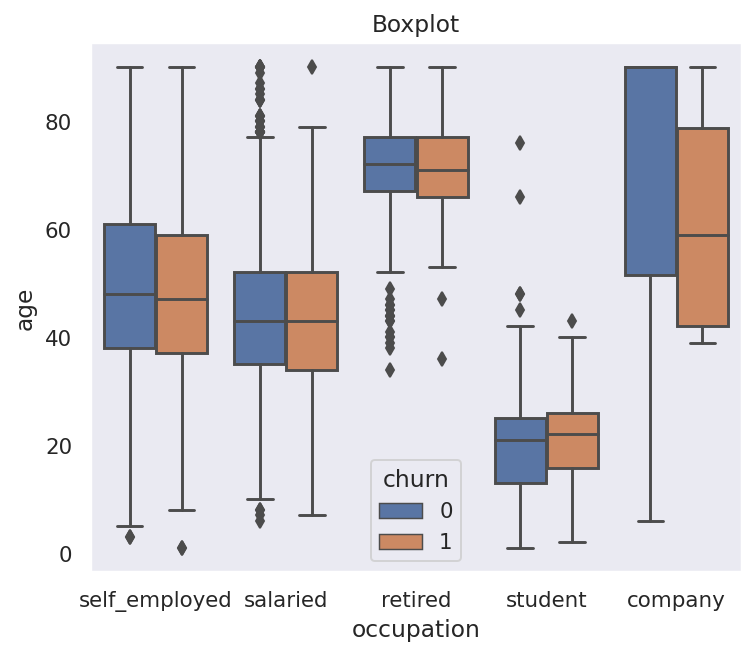

In [15]:
#lets see the age occupation and churn
Grouped_Box_Plot(data, 'age', 'occupation', 'churn')

- there is an age difference in the self employed category , by which we can infer young customer in self-employed category are more likely to churn.
- in the retired occupation of non churning customer , we can see quite a few outliers by which we can say the customer who retired early are less likely to churn.
- if a customer is student of higher age then they are less likely to churn since we can few outliers here as well.
- salaried customer with age more than 65-70 are less likely to churn.
- wrt to company , we have really less data available so reaching at any general conclusion based on that is really something we should not do

# Vintage, Gender and churn

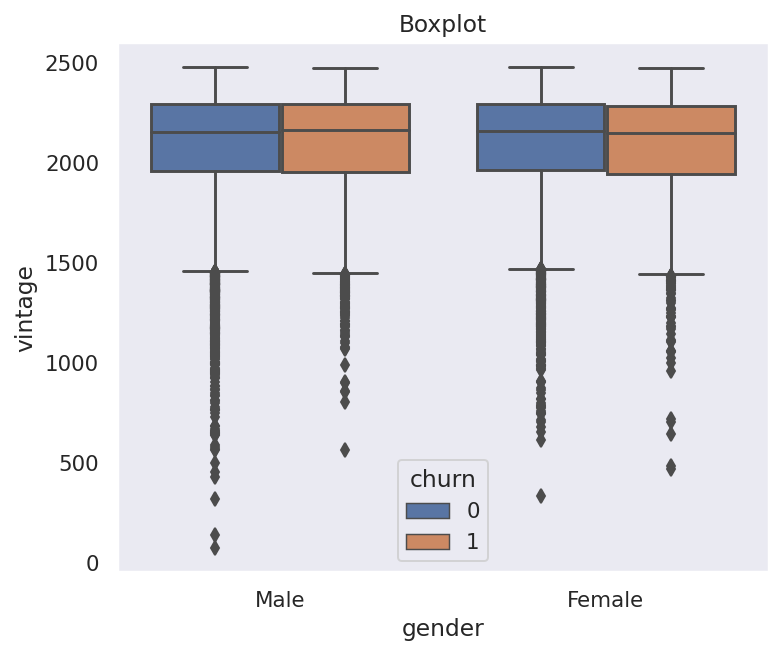

In [16]:
Grouped_Box_Plot(data, 'vintage', 'gender', 'churn')

- - there is no visible pattern we can draw from here

# pairplot

In [17]:
#comparison of churn with current and previous month balances

balance_cols = ['current_balance','previous_month_end_balance',
                'current_month_balance', 'previous_month_balance']
data1 = pd.DataFrame()

for i in balance_cols:
    data1[str('log_')+ i] = np.log(data[i] + 6000)

log_balance_cols = data1.columns

In [18]:
data1['churn'] = data['churn']

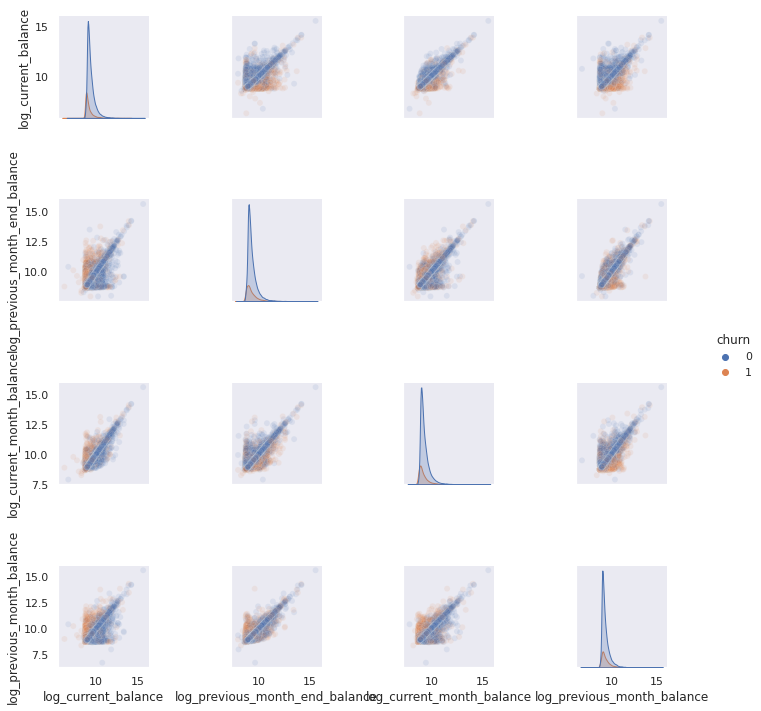

In [19]:
sns.pairplot(data1,vars=log_balance_cols,hue ='churn',plot_kws={'alpha':0.1})
plt.show()
#Log of current balance & previous month end balance
#Log of average monthly balance of current and previous month

- There is high correlation between the previous and current month balances 
- The distribution for churn and not churn is slightly different for both the cases

## credit and debit for current and the previous months

In [20]:
cr_dr_cols = ['current_month_credit','previous_month_credit', 
              'current_month_debit', 'previous_month_debit']
data1 = pd.DataFrame()

for i in cr_dr_cols:
    data1[str('log_')+ i] = np.log(data[i])

log_dr_cr_cols = data1.columns

In [21]:
data1['churn'] = data['churn']

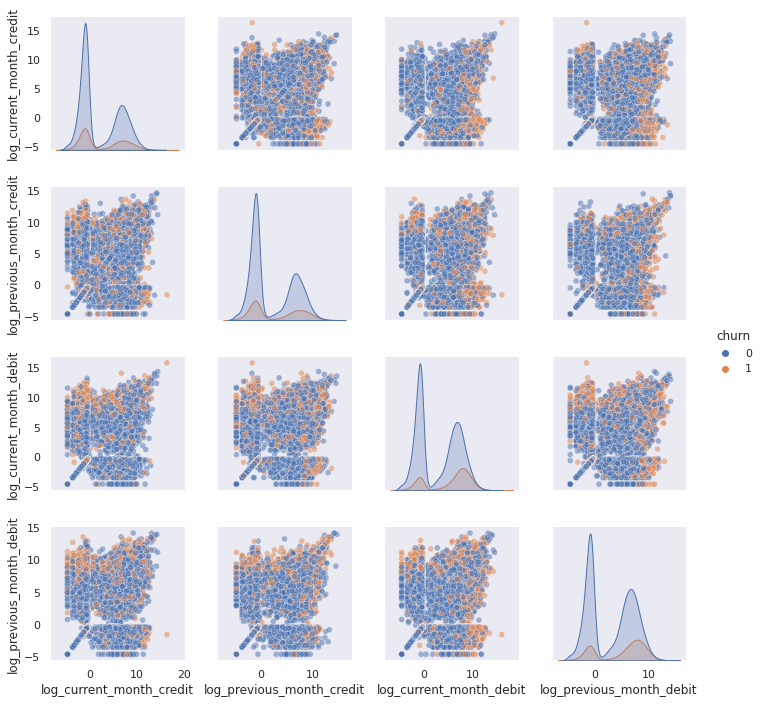

In [22]:
sns.pairplot(data1,vars=log_dr_cr_cols, hue = 'churn',plot_kws={'alpha':0.5})
plt.show()

- Both credit and debit patterns show significant difference in distributions for churned and non churned customers.

- Bimodal distribution/Double Bell Curve shows that there are 2 different types of customers with 2 brackets of credit and debit. Now, during the modeling phase, these could be considered as a seperate set of customers
For debit values, we see that there is a significant difference in the distribution for churn and non churn and it might turn out to be an important feature